In [1]:
import os
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt


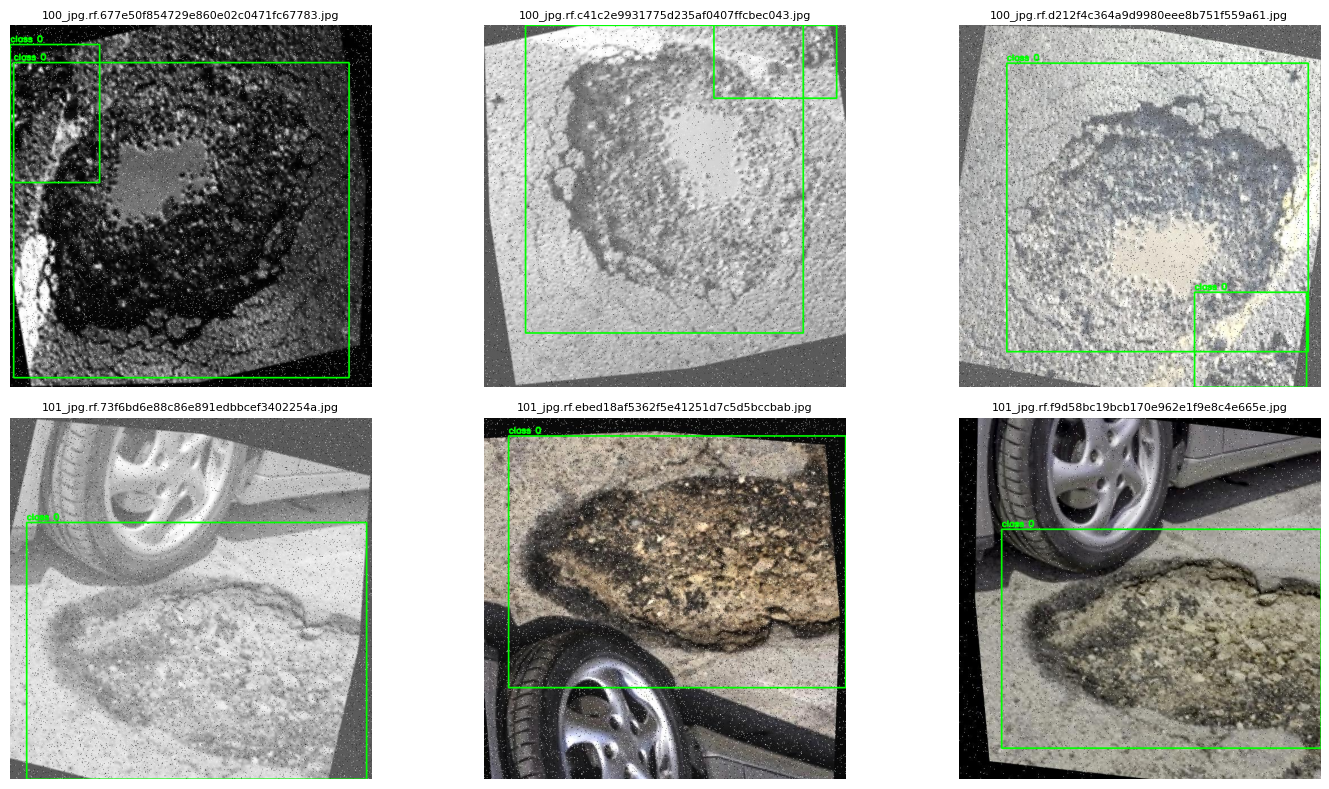

In [2]:
import os
import cv2
import matplotlib.pyplot as plt


train_set = r"c:\Users\Siddharth Sharma\OneDrive\Desktop\DATA for Project\train\images"
label_folder = r"c:\Users\Siddharth Sharma\OneDrive\Desktop\DATA for Project\train\labels"


img_files = [f for f in os.listdir(train_set) if f.endswith(('.jpg', '.png'))]

def show_images_with_labels(img_list, rows=2, cols=3):
    plt.figure(figsize=(15, 8))

    for i, img_name in enumerate(img_list):
        img_path = os.path.join(train_set, img_name)
        label_file = os.path.splitext(img_name)[0] + ".txt"
        label_path = os.path.join(label_folder, label_file)

        
        img = cv2.imread(img_path)
        h, w, _ = img.shape

        
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    cls, x_center, y_center, bw, bh = map(float, line.split())
                    x1 = int((x_center - bw/2) * w)
                    y1 = int((y_center - bh/2) * h)
                    x2 = int((x_center + bw/2) * w)
                    y2 = int((y_center + bh/2) * h)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
                    cv2.putText(img, f"class {int(cls)}", (x1, y1-5),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

        
        plt.subplot(rows, cols, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(img_name, fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_images_with_labels(img_files[:6], rows=2, cols=3)




In [11]:
train: "c:/Users/Siddharth Sharma/OneDrive/Desktop/data for Project/train/images"
val: "c:/Users/Siddharth Sharma/OneDrive/Desktop/data for Project/valid/images"

nc: 3
names: ['pothole_type_1','pothole_type_2','pothole_type_3']



In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="c:/Users/Siddharth Sharma/OneDrive/Desktop/data for Project/data.yaml", epochs=1, imgsz=640)



New https://pypi.org/project/ultralytics/8.3.197 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.40  Python-3.13.5 torch-2.7.1+cpu CPU (Intel Core(TM) i7-1065G7 1.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:/Users/Siddharth Sharma/OneDrive/Desktop/data for Project/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

train: Scanning C:\Users\Siddharth Sharma\OneDrive\Desktop\DATA for Project\train\labels.cache... 2067 images, 0 backgrou
C:\Users\Siddharth Sharma\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\Siddharth Sharma\OneDrive\Desktop\DATA for Project\valid\labels.cache... 16 images, 0 backgrounds,


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.819      2.557      1.923         12        640: 100%|██████████| 130/130 [37:51<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:


                   all         16         25      0.277        0.2      0.106     0.0411

1 epochs completed in 0.634 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.40  Python-3.13.5 torch-2.7.1+cpu CPU (Intel Core(TM) i7-1065G7 1.30GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:


                   all         16         25      0.277        0.2      0.105     0.0409
Speed: 2.9ms preprocess, 123.9ms inference, 0.0ms loss, 13.7ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019906F4B250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [14]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

metrics = model.val(data="c:/Users/Siddharth Sharma/OneDrive/Desktop/data for Project/data.yaml")
print(metrics)



Ultralytics 8.3.40  Python-3.13.5 torch-2.7.1+cpu CPU (Intel Core(TM) i7-1065G7 1.30GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning C:\Users\Siddharth Sharma\OneDrive\Desktop\DATA for Project\valid\labels.cache... 16 images, 0 backgrounds,
C:\Users\Siddharth Sharma\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:


                   all         16         25       0.97       0.08      0.086     0.0447
                person         16         25       0.97       0.08      0.086     0.0447
Speed: 4.9ms preprocess, 167.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs\detect\val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019915249220>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.0

SyntaxError: invalid syntax (4225443184.py, line 1)